# analysis.ipynb

## Packages

In [28]:
# Load packages
import pandas as pd
import numpy as np
import sklearn as sk
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import dataframe_image as dfi
import statistics

## Datasets

In [2]:
# Load datasets

# All player statistics
playersDF = pd.read_csv("data/players.csv")
fullStatsDF = pd.read_csv("data/fullStats.csv")

# All contracts; need to join together
salariesDF_85_18 = pd.read_csv("data/salaries_1985to2018.csv")
salariesDF_18_19 = pd.read_csv("data/salaries_2018to2019.csv")
salariesDF_19_20 = pd.read_csv("data/salaries_2019to2020.csv")
salariesDF_20_21 = pd.read_csv("data/salaries_2020to2021.csv")

# Team Cap Space from 2018 to 2021
teamDF_18_19 = pd.read_csv("data/teamCap_2018to2019.csv")
teamDF_19_20 = pd.read_csv("data/teamCap_2019to2020.csv")
teamDF_20_21 = pd.read_csv("data/teamCap_2020to2021.csv")

## Analysis

### Examine Players Dataframe

In [3]:
playersDF['draft_year'] = playersDF['draft_year'].fillna('undrafted')
playersDF['draft_team'] = playersDF['draft_team'].fillna('undrafted')
playersDF = playersDF.fillna(0)
playersDF = playersDF.replace(['-'],0)
playersDF = playersDF[['player_id','name','college','draft_year','primaryPosition','secondaryPosition']] # Descriptive statistics

In [4]:
playersDF

,player_id,name,college,draft_year,primaryPosition,secondaryPosition
0,crossch01,Chink Crossin,University of Pennsylvania,1947,Guard,0
1,ehlerbu01,Bulbs Ehlers,Purdue University,1947,Forward/Guard,0
2,holubdi01,Dick Holub,Long Island University,1947,Center,0
3,hustopa01,Paul Huston,Ohio State University,1947,Forward,0
4,okeefdi01,Dick O'Keefe,Santa Clara University,1947,Guard/Forward,0
...,...,...,...,...,...,...
4680,zawolze01,Zeke Zawoluk,St. John's University,undrafted,SmallForward,PowerForward
4681,zelleha01,Harry Zeller,Washington & Jefferson College,undrafted,Center/Forward,0
4682,zellelu01,Luke Zeller,University of Notre Dame,undrafted,Center,0
4683,zoetji01,Jim Zoet,Kent State University,undrafted,Center,0


In [5]:
playersDF.groupby(['primaryPosition']).agg(['count'])

,player_id,name,college,draft_year,secondaryPosition
,count,count,count,count,count
primaryPosition,,,,,
Center,782,782,782,782,782
Center/Forward,23,23,23,23,23
Forward,162,162,162,162,162
Forward/Center,35,35,35,35,35
Forward/Guard,36,36,36,36,36
Guard,163,163,163,163,163
Guard/Forward,50,50,50,50,50
PointGuard,770,770,770,770,770


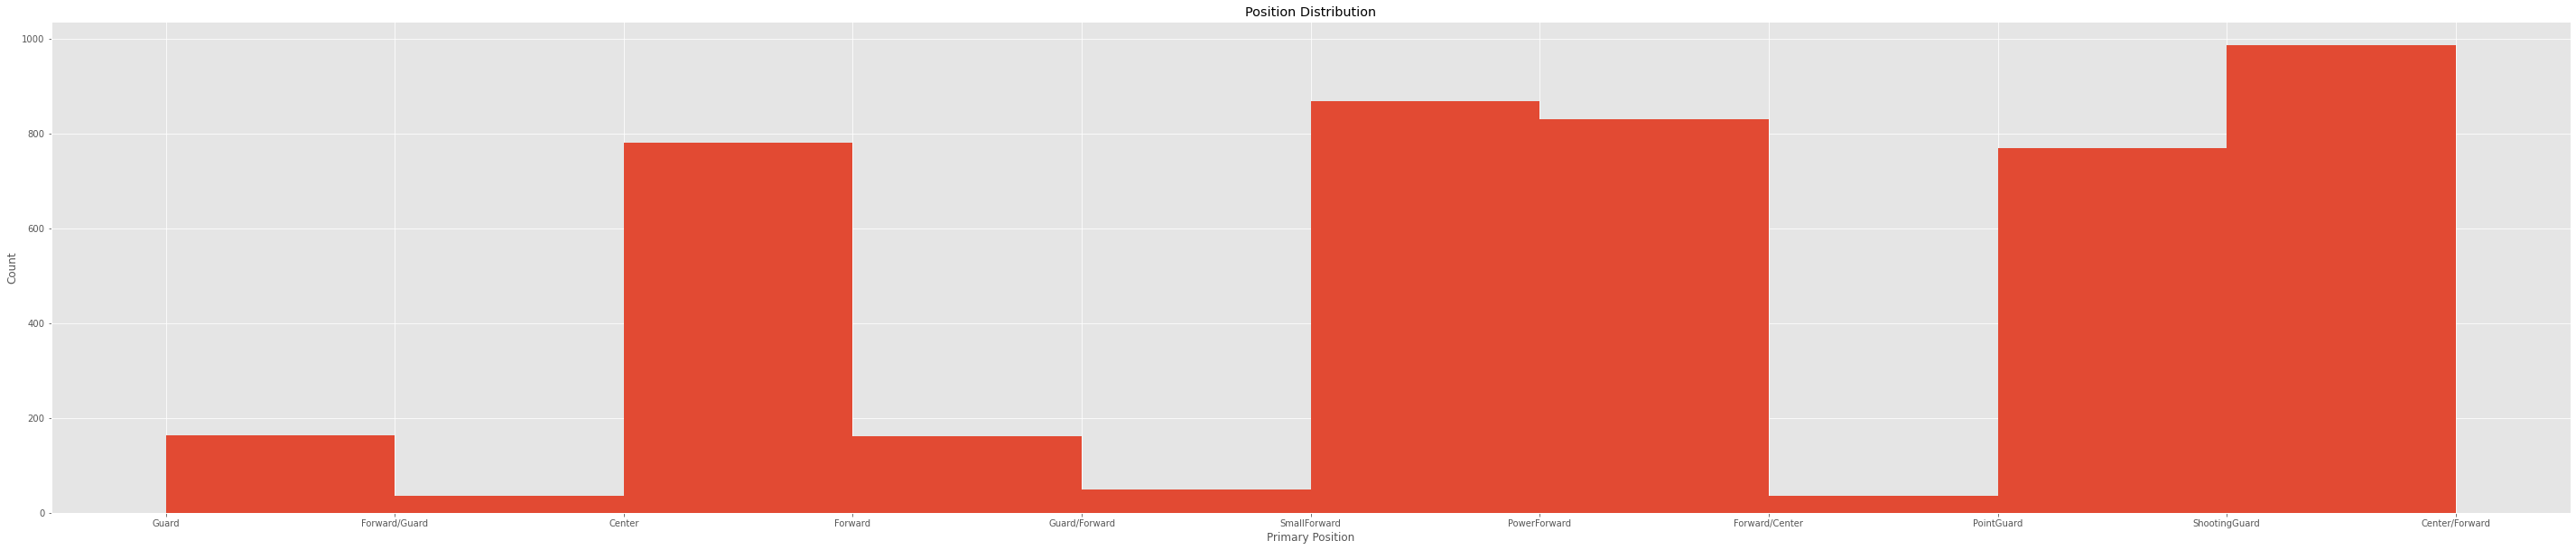

In [6]:
# Position Histogram
plt.style.use('ggplot')
plt.figure(figsize = (50,10))
pos = playersDF['primaryPosition']
plt.title('Position Distribution')
plt.xlabel('Primary Position')  
plt.ylabel('Count')
pos.hist()
plt.savefig('images/positionHist.png', dpi=200, transparent = True)  
plt.show()

Most observed positions were Shooting Guards (964), Small Forwards (869), Power Forwards (831), Center (782), and Point Guards (770)

In [7]:
fullStatsDF = fullStatsDF.fillna(0)
fullStatsDF = fullStatsDF.replace(['rookie'],1)
fullStatsDF = fullStatsDF.replace(['champion'],1)                                  
fullStatsDF

,name,season_start,G,GS,FGM,FGA,FG%,3FGM,3FGA,3FG%,...,DEF.1,REB.1,AST.1,STL.1,BLK.1,TO.1,PF.1,PTS.1,rookie?,champion
0,Alaa Abdelnaby,1990,43.0,0.0,55.0,116.0,0.5,0.0,0.0,0.0,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1,0
1,Alaa Abdelnaby,1991,71.0,1.0,178.0,361.0,0.5,0.0,0.0,0.0,...,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,0,0
2,Alaa Abdelnaby,1992,75.0,52.0,245.0,473.0,0.5,0.0,1.0,0.0,...,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,0,0
3,Alaa Abdelnaby,1993,13.0,0.0,24.0,55.0,0.4,0.0,0.0,0.0,...,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,0,0
4,Alaa Abdelnaby,1994,54.0,0.0,118.0,231.0,0.5,0.0,2.0,0.0,...,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,Ante Zizic,2019,22.0,0.0,41.0,72.0,0.6,0.0,0.0,0.0,...,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,0,0
13560,Ivica Zubac,2016,38.0,11.0,126.0,238.0,0.5,0.0,3.0,0.0,...,3.1,4.2,0.8,0.4,0.9,0.8,1.7,7.5,1,0
13561,Ivica Zubac,2017,43.0,0.0,61.0,122.0,0.5,0.0,1.0,0.0,...,1.8,2.8,0.6,0.2,0.3,0.6,1.1,3.7,0,0
13562,Ivica Zubac,2018,59.0,37.0,212.0,379.0,0.6,0.0,0.0,0.0,...,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,0,0


In [8]:
fullStatsDF = pd.merge(fullStatsDF, playersDF, how = 'inner', on = 'name')
fullStatsDF

,name,season_start,G,GS,FGM,FGA,FG%,3FGM,3FGA,3FG%,...,TO.1,PF.1,PTS.1,rookie?,champion,player_id,college,draft_year,primaryPosition,secondaryPosition
0,Alaa Abdelnaby,1990,43.0,0.0,55.0,116.0,0.5,0.0,0.0,0.0,...,0.5,0.9,3.1,1,0,abdelal01,Duke University,1990,PowerForward,0
1,Alaa Abdelnaby,1991,71.0,1.0,178.0,361.0,0.5,0.0,0.0,0.0,...,0.9,1.9,6.1,0,0,abdelal01,Duke University,1990,PowerForward,0
2,Alaa Abdelnaby,1992,75.0,52.0,245.0,473.0,0.5,0.0,1.0,0.0,...,1.3,2.5,7.7,0,0,abdelal01,Duke University,1990,PowerForward,0
3,Alaa Abdelnaby,1993,13.0,0.0,24.0,55.0,0.4,0.0,0.0,0.0,...,1.3,1.5,4.9,0,0,abdelal01,Duke University,1990,PowerForward,0
4,Alaa Abdelnaby,1994,54.0,0.0,118.0,231.0,0.5,0.0,2.0,0.0,...,0.8,1.9,4.7,0,0,abdelal01,Duke University,1990,PowerForward,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,Ante Zizic,2019,22.0,0.0,41.0,72.0,0.6,0.0,0.0,0.0,...,0.5,1.2,4.4,0,0,zizican01,0,2016,Center,0
13254,Ivica Zubac,2016,38.0,11.0,126.0,238.0,0.5,0.0,3.0,0.0,...,0.8,1.7,7.5,1,0,zubaciv01,0,2016,Center,0
13255,Ivica Zubac,2017,43.0,0.0,61.0,122.0,0.5,0.0,1.0,0.0,...,0.6,1.1,3.7,0,0,zubaciv01,0,2016,Center,0
13256,Ivica Zubac,2018,59.0,37.0,212.0,379.0,0.6,0.0,0.0,0.0,...,1.2,2.3,8.9,0,0,zubaciv01,0,2016,Center,0


### Examine Salaries

#### Prepare datasets and join

In [9]:
salariesDF_85_18 = salariesDF_85_18.drop(columns = ['team'])
salariesDF_85_18

,player_id,salary,season,season_end,season_start
0,abdelal01,"$395,000",1990-91,1991,1990
1,abdelal01,"$494,000",1991-92,1992,1991
2,abdelal01,"$500,000",1992-93,1993,1992
3,abdelal01,"$805,000",1993-94,1994,1993
4,abdelal01,"$650,000",1994-95,1995,1994
...,...,...,...,...,...
14158,zipsepa01,"$750,000",2016-17,2017,2016
14159,zipsepa01,"$1,312,611",2017-18,2018,2017
14160,zizican01,"$1,645,200",2017-18,2018,2017
14161,zubaciv01,"$1,034,956",2016-17,2017,2016


In [10]:
playersID = playersDF[['player_id', 'name']].copy()
playersID.to_csv("data/playersID.csv")

In [11]:
salaries0 = pd.merge(salariesDF_85_18, playersID, how = 'left', on = 'player_id')
salaries0

,player_id,salary,season,season_end,season_start,name
0,abdelal01,"$395,000",1990-91,1991,1990,Alaa Abdelnaby
1,abdelal01,"$494,000",1991-92,1992,1991,Alaa Abdelnaby
2,abdelal01,"$500,000",1992-93,1993,1992,Alaa Abdelnaby
3,abdelal01,"$805,000",1993-94,1994,1993,Alaa Abdelnaby
4,abdelal01,"$650,000",1994-95,1995,1994,Alaa Abdelnaby
...,...,...,...,...,...,...
14158,zipsepa01,"$750,000",2016-17,2017,2016,Paul Zipser
14159,zipsepa01,"$1,312,611",2017-18,2018,2017,Paul Zipser
14160,zizican01,"$1,645,200",2017-18,2018,2017,Ante Zizic
14161,zubaciv01,"$1,034,956",2016-17,2017,2016,Ivica Zubac


In [12]:
salariesDF_18_19['season_end'] = 2019
salariesDF_18_19['season_start'] = 2018
salariesDF_18_19

,player,salary,season_end,season_start
0,Stephen Curry,"$37,457,154",2019,2018
1,Russell Westbrook,"$35,665,000",2019,2018
2,LeBron James,"$35,654,150",2019,2018
3,Chris Paul,"$35,654,150",2019,2018
4,Kyle Lowry,"$32,700,000",2019,2018
...,...,...,...,...
571,Michael Frazier,"$47,370",2019,2018
572,Tahjere McCall,"$47,370",2019,2018
573,Mitchell Creek,"$47,370",2019,2018
574,Isaac Humphries,"$47,370",2019,2018


In [13]:
salariesDF = pd.merge(playersID, salariesDF_18_19, left_on='name', right_on='player')
salariesDF

,player_id,name,player,salary,season_end,season_start
0,cartevi01,Vince Carter,Vince Carter,"$2,393,887",2019,2018
1,nowitdi01,Dirk Nowitzki,Dirk Nowitzki,"$5,000,000",2019,2018
2,ginobma01,Manu Ginobili,Manu Ginobili,"$2,500,000",2019,2018
3,crawfja01,Jamal Crawford,Jamal Crawford,"$4,698,113",2019,2018
4,chandty01,Tyson Chandler,Tyson Chandler,"$13,585,000",2019,2018
...,...,...,...,...,...,...
518,willial03,Alan Williams,Alan Williams,"$77,250",2019,2018
519,willijo04,Johnathan Williams,Johnathan Williams,"$127,250",2019,2018
520,willike04,Kenrich Williams,Kenrich Williams,"$838,464",2019,2018
521,willitr02,Troy Williams,Troy Williams,"$77,250",2019,2018


In [14]:
salariesDF_19_20['season_end'] = 2020
salariesDF_19_20['season_start'] = 2019
salariesDF1 = pd.merge(playersID, salariesDF_19_20, left_on='name', right_on='player')
salariesDF1

,player_id,name,player,salary,season_end,season_start
0,porteke01,Kevin Porter,Kevin Porter,"$1,290,960",2020,2019
1,cartevi01,Vince Carter,Vince Carter,"$2,564,753",2020,2019
2,crawfja01,Jamal Crawford,Jamal Crawford,"$289,803",2020,2019
3,chandty01,Tyson Chandler,Tyson Chandler,"$2,564,753",2020,2019
4,anthoca01,Carmelo Anthony,Carmelo Anthony,"$2,159,029",2020,2019
...,...,...,...,...,...,...
361,wanambr01,Brad Wanamaker,Brad Wanamaker,"$1,445,697",2020,2019
362,watanyu01,Yuta Watanabe,Yuta Watanabe,"$79,568",2020,2019
363,willijo04,Johnathan Williams,Johnathan Williams,"$161,245",2020,2019
364,willike04,Kenrich Williams,Kenrich Williams,"$1,416,852",2020,2019


In [15]:
frames = [salaries0, salariesDF, salariesDF1]

In [16]:
salariesDF = pd.concat(frames, sort = False)
salariesDF = salariesDF.drop(columns = ['player','season'])

In [17]:
salariesDF['salary'] = salariesDF['salary'].str.replace(',', '')
salariesDF['salary'] = salariesDF['salary'].str.replace('$', '')
salariesDF['salary'] = salariesDF['salary'].astype(float)
salariesDF

,player_id,salary,season_end,season_start,name
0,abdelal01,395000.0,1991,1990,Alaa Abdelnaby
1,abdelal01,494000.0,1992,1991,Alaa Abdelnaby
2,abdelal01,500000.0,1993,1992,Alaa Abdelnaby
3,abdelal01,805000.0,1994,1993,Alaa Abdelnaby
4,abdelal01,650000.0,1995,1994,Alaa Abdelnaby
...,...,...,...,...,...
361,wanambr01,1445697.0,2020,2019,Brad Wanamaker
362,watanyu01,79568.0,2020,2019,Yuta Watanabe
363,willijo04,161245.0,2020,2019,Johnathan Williams
364,willike04,1416852.0,2020,2019,Kenrich Williams


In [18]:
salariesDF_20_21['season_end'] = 2021
salariesDF_20_21['season_start'] = 2020
# I think I will avoid this dataframe until the end due to complexity and we don't know their stats this year.
# We should try to take this and make predictions on their stats to give their team the most bang for their buck

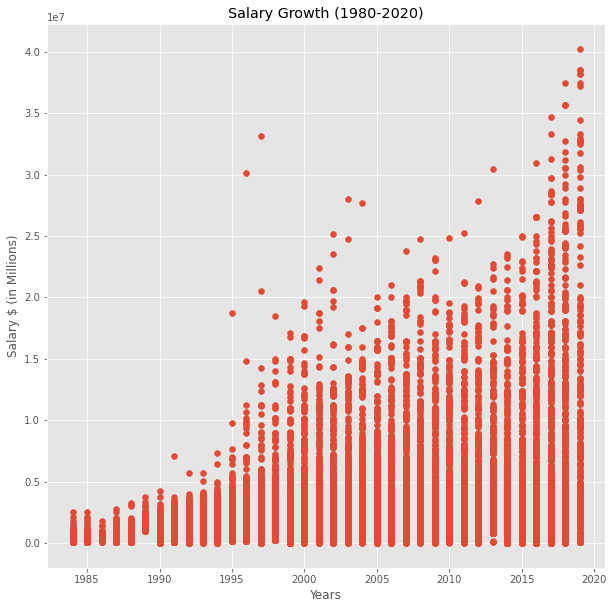

In [19]:
# Overall Salary Growth
x = salariesDF['season_start']
y = salariesDF['salary']
plt.figure(figsize = (10,10))
salaryGrowth = plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Salary $ (in Millions)')
plt.title('Salary Growth (1980-2020)')
plt.savefig('images/salGrowth.png', dpi=200, transparent = True)  
plt.show()

In [20]:
# Median Salary Growth
medSal = salariesDF.groupby(by='season_end').median()
medSal

,salary,season_start
season_end,,
1985,302500.0,1984
1986,257500.0,1985
1987,495833.5,1986
1988,339250.0,1987
1989,380000.0,1988
1990,1500000.0,1989
1991,650000.0,1990
1992,750000.0,1991
1993,813500.0,1992


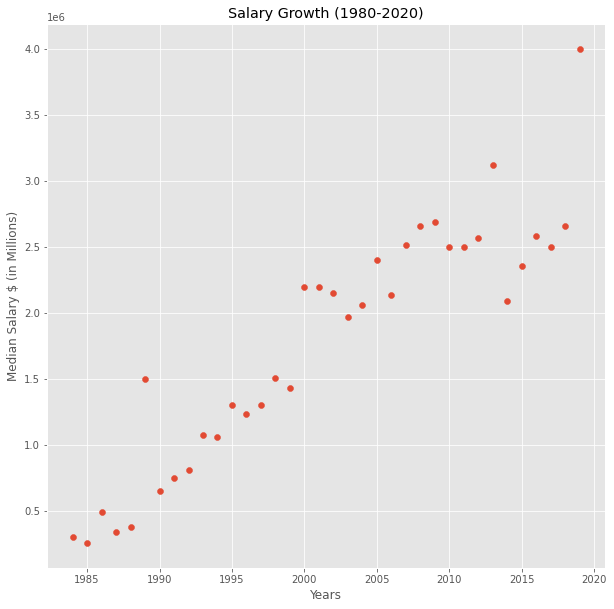

In [21]:
x = medSal['season_start']
y = medSal['salary']
plt.figure(figsize = (10,10))
salaryGrowth = plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Median Salary $ (in Millions)')
plt.title('Salary Growth (1980-2020)')
plt.savefig('images/salGrowth2.png', dpi=200, transparent = True)  
plt.show()
# That's really eye opening. The median salary has jumped from <$500K in 1985 to ~$4M in 2020! 
# That's a 700% increase in 35 years
# It's increased from ~$2.5M in 2015 to $4M in 2020!
# That's a 60% increase in 5 years

### Merge Salaries and Stats

In [22]:
salariesStats = pd.merge(salariesDF, fullStatsDF, how = 'inner', on = ['player_id','season_start'])

In [23]:
salariesStats

,player_id,salary,season_end,season_start,name_x,name_y,G,GS,FGM,FGA,...,BLK.1,TO.1,PF.1,PTS.1,rookie?,champion,college,draft_year,primaryPosition,secondaryPosition
0,abdelal01,395000.0,1991,1990,Alaa Abdelnaby,Alaa Abdelnaby,43.0,0.0,55.0,116.0,...,0.3,0.5,0.9,3.1,1,0,Duke University,1990,PowerForward,0
1,abdelal01,494000.0,1992,1991,Alaa Abdelnaby,Alaa Abdelnaby,71.0,1.0,178.0,361.0,...,0.2,0.9,1.9,6.1,0,0,Duke University,1990,PowerForward,0
2,abdelal01,500000.0,1993,1992,Alaa Abdelnaby,Alaa Abdelnaby,75.0,52.0,245.0,473.0,...,0.3,1.3,2.5,7.7,0,0,Duke University,1990,PowerForward,0
3,abdelal01,805000.0,1994,1993,Alaa Abdelnaby,Alaa Abdelnaby,13.0,0.0,24.0,55.0,...,0.2,1.3,1.5,4.9,0,0,Duke University,1990,PowerForward,0
4,abdelal01,650000.0,1995,1994,Alaa Abdelnaby,Alaa Abdelnaby,54.0,0.0,118.0,231.0,...,0.2,0.8,1.9,4.7,0,0,Duke University,1990,PowerForward,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,wanambr01,1445697.0,2020,2019,Brad Wanamaker,Brad Wanamaker,71.0,1.0,162.0,362.0,...,0.2,1.1,1.9,6.9,0,0,University of Pittsburgh,undrafted,PointGuard,0
12745,watanyu01,79568.0,2020,2019,Yuta Watanabe,Yuta Watanabe,18.0,0.0,15.0,34.0,...,0.1,0.1,0.5,2.0,0,0,George Washington University,undrafted,SmallForward,0
12746,willijo04,161245.0,2020,2019,Johnathan Williams,Johnathan Williams,15.0,6.0,19.0,34.0,...,0.5,0.3,1.1,3.0,0,0,"University of Missouri, Gonzaga University",undrafted,Center,0
12747,willike04,1416852.0,2020,2019,Kenrich Williams,Kenrich Williams,39.0,18.0,51.0,147.0,...,0.5,0.6,2.3,3.5,0,0,Texas Christian University,undrafted,SmallForward,0


In [24]:
salariesStats = salariesStats.drop(columns = ['name_y'])
salariesStats = salariesStats.rename(columns={"name_x": "name"})
salariesStats

,player_id,salary,season_end,season_start,name,G,GS,FGM,FGA,FG%,...,BLK.1,TO.1,PF.1,PTS.1,rookie?,champion,college,draft_year,primaryPosition,secondaryPosition
0,abdelal01,395000.0,1991,1990,Alaa Abdelnaby,43.0,0.0,55.0,116.0,0.5,...,0.3,0.5,0.9,3.1,1,0,Duke University,1990,PowerForward,0
1,abdelal01,494000.0,1992,1991,Alaa Abdelnaby,71.0,1.0,178.0,361.0,0.5,...,0.2,0.9,1.9,6.1,0,0,Duke University,1990,PowerForward,0
2,abdelal01,500000.0,1993,1992,Alaa Abdelnaby,75.0,52.0,245.0,473.0,0.5,...,0.3,1.3,2.5,7.7,0,0,Duke University,1990,PowerForward,0
3,abdelal01,805000.0,1994,1993,Alaa Abdelnaby,13.0,0.0,24.0,55.0,0.4,...,0.2,1.3,1.5,4.9,0,0,Duke University,1990,PowerForward,0
4,abdelal01,650000.0,1995,1994,Alaa Abdelnaby,54.0,0.0,118.0,231.0,0.5,...,0.2,0.8,1.9,4.7,0,0,Duke University,1990,PowerForward,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,wanambr01,1445697.0,2020,2019,Brad Wanamaker,71.0,1.0,162.0,362.0,0.4,...,0.2,1.1,1.9,6.9,0,0,University of Pittsburgh,undrafted,PointGuard,0
12745,watanyu01,79568.0,2020,2019,Yuta Watanabe,18.0,0.0,15.0,34.0,0.4,...,0.1,0.1,0.5,2.0,0,0,George Washington University,undrafted,SmallForward,0
12746,willijo04,161245.0,2020,2019,Johnathan Williams,15.0,6.0,19.0,34.0,0.6,...,0.5,0.3,1.1,3.0,0,0,"University of Missouri, Gonzaga University",undrafted,Center,0
12747,willike04,1416852.0,2020,2019,Kenrich Williams,39.0,18.0,51.0,147.0,0.3,...,0.5,0.6,2.3,3.5,0,0,Texas Christian University,undrafted,SmallForward,0


In [25]:
sumSalaries_player = salariesStats.groupby(['name'])['salary'].sum().sort_values(ascending=False).head(20)
sumSalaries_player = pd.DataFrame(sumSalaries_player)
sumSalaries_player #Top career earnings: Kevin Garnett, Kobe Bryant, LeBron James
dfi.export(sumSalaries_player, 'images/allTimePay.png', max_rows = 10)

In [30]:
medSalaries_position = salariesStats.groupby(['primaryPosition'])['salary'].median().sort_values(ascending=False).head(20)
medSalaries_position = pd.DataFrame(medSalaries_position)
medSalaries_position # Most expensive position on average are Centers
dfi.export(avgSalaries_position, 'images/medSalaries.png', max_rows = 10)

In [27]:
salariesStats.to_csv('data/salariesStats.csv')